# Algorytmy macierzowe - mnożenie macierzy
## Wykonali: Robert Kazimirek, Paweł Kruczkiewicz


**Numer ćwiczenia: 3**

*Temat:* Proszę napisać mnożenie macierzy rIGA i rIGA używając algorytmu mnożenia blokowego, i 
dobrać optymalną kolejność pętli oraz rozmiar bloków 

Treść ćwiczenia:

1. Proszę wybrać dwie możliwie największe macierze A i B ze swoich dwóch 
rodzin macierzy, takie żeby zgadzały się ich rozmiary, oraz przemnożyć je 
A*B swoim optymalnym algorytmem (tak duże macierze jakie da się w 
czasie kilku-kilkudziesięciu minut przemnożyć na Państwa laptopie) 
2. Proszę narysować schemat niezerowych wartości swoich dwóch macierzy 
(używając komendy spy(A), spy(B) MATLABa) oraz macierzy wynikowej 
A*B 
3. Proszę zmierzyć czas mnożenia tych wybranych dwóch dużych macierzy dla 
różnej kolejności pętli w algorytmie mnożenia macierzy. Proszę narysować 
tabelkę: kolejność pętli (6 możliwości) versus czasy mnożenia 
3. Proszę wybrać jedną kolejność pętli i następnie dla swoich dwóch macierzy 
A i B zmierzyć czasy mnożenia w algorytmie mnożenia blokowego.  Proszę 
narysować wykres: oś x rozmiar bloków, oś y czas mnożenia 
4. Proszę obliczyć liczbę operacji zmienno-przecinkowych koniecznych do 



In [6]:
import numpy as np
import matplotlib.pyplot as plt

### Ad. 1
Jako macierze A i B wybraliśmy macierze wygenerowane przez podany na zajęciach skrypt `massmatrix.m`. W tym celu użyliśmy funkcji `massmatrix(2,nxx,2,2)`, gdzie nxx = {2,3,4}. Następnie wyniki zapisaliśmy w pliku o formacie csv. Poniższy kod wczytuje obie macierze jako `np.array` 

In [7]:
def get_matrix_from_csv(csv_file):
    return np.loadtxt(open(csv_file, "rb"), delimiter=",", skiprows=0)

In [8]:
def scale_matrix(a, n):
    a_size = len(a)
    new_matrix = np.zeros([a_size * n, a_size * n])

    for x_index in range(n * a_size):
        for y_index in range(n * a_size):
            new_matrix[x_index, y_index] = a.item(x_index % a_size, y_index % a_size)

    return new_matrix

In [9]:
A = scale_matrix(get_matrix_from_csv("rigas/riga100.csv"), 1)
B = scale_matrix(get_matrix_from_csv("rigas/riga100.csv"), 1)

### Ad. 2
Poniżej przedstawiamy niezerowe pola wejściowych oraz wyjściowe macierzy. Fiolet oznacza niezerową wartość, żółty oznacza zerową. Do mnożenia macierzy wykorzystano wbudowany w bibliotekę numpy znak mnożenia macierzy

In [10]:
def spy(matrix, label, plot):
    mask = matrix == 0
    plot.matshow(mask)

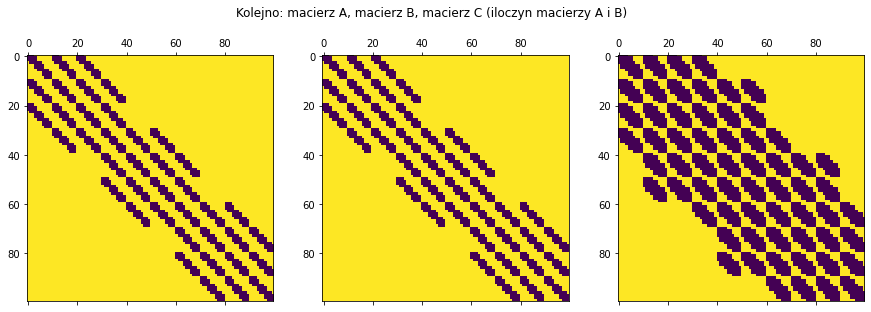

In [11]:
n = np.size(A, 0)
C = A@B
    
fig, (plot_1, plot_2, plot_3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Kolejno: macierz A, macierz B, macierz C (iloczyn macierzy A i B)')

spy(A, f"A, size={n}", plot_1)
spy(B, f"B, size={n}", plot_2)
spy(C, f"C, size={n}", plot_3)

### Ad. 3
Teraz zmierzymy czas dla wszystkich możliwych 6 permutacji obliczania iloczynu macierzy. Urzyjemy do tego funkcji `log_time`, która wypisze nam czas trwania funkcji w sekundach

In [12]:
from time import time

def log_time(func, message):
    number_of_tests = 5
    exec_times = []
    for _ in range(number_of_tests):
        t1 = time()
        func()
        t2 = time()
        exec_times.append(round(t2 - t1, 5))
    
    avg_time = round(sum(exec_times)/number_of_tests, 5)
    print(f"{message:8}: {avg_time} [s]")
    return avg_time

In [13]:
def multi_ijp(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for i in range(m):
        for j in range(n):
            for p in range(k):
                C[i][j] += A[i][p] * B[p][j]
                
                
def multi_ipj(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for i in range(m):
        for p in range(k):
            for j in range(n):
                C[i][j] += A[i][p] * B[p][j]


def multi_jip(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for j in range(n):
        for i in range(m):
            for p in range(k):
                C[i][j] += A[i][p] * B[p][j]


def multi_jpi(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for j in range(n):
        for p in range(k):
            for i in range(m):
                C[i][j] += A[i][p] * B[p][j]


def multi_pij(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for p in range(k):
        for i in range(m):
            for j in range(n):
                C[i][j] += A[i][p] * B[p][j]


def multi_pji(A, B, C):
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)
    for p in range(k):
        for j in range(n):
            for i in range(m):
                C[i][j] += A[i][p] * B[p][j]



def mat_mul(A, B, mul_func=multi_ijp):
    C = np.zeros((np.size(A, 0), np.size(B, 1)))
    mul_func(A, B, C)
    return C

In [20]:
mat_mul_functions = [multi_ijp ,multi_ipj, multi_jip, multi_jpi, multi_pij, multi_pji]

print("Function  time")

times = [log_time(lambda: mat_mul(A, B, fun), fun.__name__) 
         for fun in mat_mul_functions]
mult_names = [fun.__name__ for fun in mat_mul_functions]

Function  time
multi_ijp: 2.65923 [s]
multi_ipj: 2.71908 [s]
multi_jip: 2.65568 [s]
multi_jpi: 2.59303 [s]
multi_pij: 2.55046 [s]
multi_pji: 2.55662 [s]


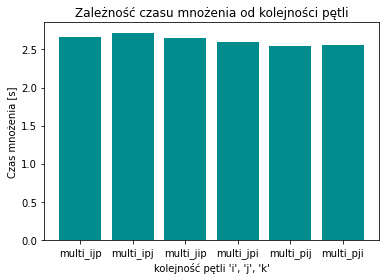

In [23]:
plt.bar(mult_names, times, color='#008c8c')

plt.xlabel("kolejność pętli 'i', 'j', 'k'")
plt.ylabel("Czas mnożenia [s]")
plt.title("Zależność czasu mnożenia od kolejności pętli")

plt.show()

Wybór kolejności występowanie pętli "i", "j", "k" nie wpłynął w sposób znaczący na prędkość operacji. Najprawdopodbniej wynika to z wysokopoziomowości języka Python, w którym zostało zaimplementowane mnożenie.

### Ad. 4
Poniżej napisaliśmy program do blokowego mnożenia macierzy. Ponieważ w tym ćwiczeniu mamy do czynienia jedynie z macierzami kwadratowymi, przyjęliśmy, że podziały bloków przy różnych kolumnach macierzy są zawsze takie same. Zależność czasu od długości pojedynczego bloku przedstawiliśmy na wykresie poniżej.

In [15]:
def block_mul(A, B, m_bs, n_bs, k_bs):
    C = np.zeros((np.size(A, 0), np.size(B, 1)))
    m, n, k = np.size(C, 0), np.size(C, 1), np.size(A, 1)

    for i in range(0, m, m_bs):
        for j in range(0, n, n_bs):
            for p in range(0, k, k_bs):
                A_slice = A[i:i+m_bs, p:p+k_bs]
                B_slice = B[p:p+k_bs, j:j+n_bs]
                C_slice = C[i:i+m_bs, j:j+n_bs]
                multi_ijp(A_slice, B_slice, C_slice)
    return C

In [16]:
block_lengths = [2, 3, 5, 10, 15, 20, 25, 33, 40, 50, 75]
times = [
    log_time(lambda: block_mul(A, B, nb, nb, nb), f"Block length {nb}") 
    for nb in block_lengths
]



Block length 2: 4.29257 [s]
Block length 3: 3.28853 [s]
Block length 5: 2.77262 [s]
Block length 10: 2.63826 [s]
Block length 15: 2.54755 [s]
Block length 20: 2.5439 [s]
Block length 25: 2.51428 [s]
Block length 33: 2.55378 [s]
Block length 40: 2.48775 [s]
Block length 50: 2.51899 [s]
Block length 75: 2.49035 [s]


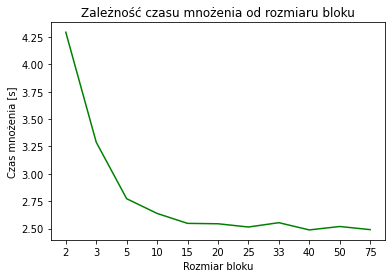

In [18]:
x_pos = [i for i, _ in enumerate(block_lengths)]

plt.plot(x_pos, times, color='green')

plt.xlabel("Rozmiar bloku")
plt.ylabel("Czas mnożenia [s]")
plt.title("Zależność czasu mnożenia od rozmiaru bloku")
plt.xticks(x_pos, block_lengths)

plt.show()

# plt.plot(block_lengths, times)
# plt.show()
# TODO zrobić ładny wykres

Małe rozmiary bloków, spowodowały wydłużenie czasu mnożenia macierzy. Przypuszczamy, że ze względu na wysokopoziomowość języka Python, stosowanie mnożenia blokowego, nie wpłynęło na przyspieszenie wykonania operacji, natomiast dodatkowe obliczenia, związane z częstszym dzieleniem macierzy, spowodowały wydłużenie czasu wykonania.

### Ad. 5


## Podsumowanie